In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Loading

In [5]:
from google.colab import files
uploaded = files.upload()

Saving fear_greed_index.csv to fear_greed_index.csv


In [4]:
from google.colab import files
uploaded = files.upload()

Saving historical_data.csv to historical_data.csv


In [6]:
fear_greed = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv")

In [7]:
print("Fear & Greed Dataset Shape:", fear_greed.shape)
print("Trades Dataset Shape:", trades.shape)

fear_greed.head()

Fear & Greed Dataset Shape: (2644, 4)
Trades Dataset Shape: (211224, 16)


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [8]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


## 2. Data Cleaning

In [9]:
fear_greed.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [10]:
trades.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [11]:
trades.duplicated().sum()

np.int64(0)

In [ ]:
## 3. Feature Engineering

In [41]:
fear_greed["date"] = pd.to_datetime(
    fear_greed["date"],
    dayfirst=True
).dt.normalize()

In [42]:
trades["Timestamp"] = pd.to_datetime(
    trades["Timestamp IST"],
    dayfirst=True
)

In [43]:
trades["date"] = trades["Timestamp"].dt.normalize()

In [44]:
trades[["Timestamp", "date"]].head()

,Timestamp,date
0,2024-12-02 22:50:00,2024-12-02
1,2024-12-02 22:50:00,2024-12-02
2,2024-12-02 22:50:00,2024-12-02
3,2024-12-02 22:50:00,2024-12-02
4,2024-12-02 22:50:00,2024-12-02


In [ ]:
## 4. Data Aggregation

In [45]:
daily_trades = trades.groupby("date").agg(
    total_trades=("Trade ID", "count"),
    total_pnl=("Closed PnL", "sum"),
    avg_pnl=("Closed PnL", "mean"),
    avg_trade_size_usd=("Size USD", "mean")
).reset_index()

In [46]:
daily_trades.head()
daily_trades.shape

(480, 5)

In [47]:
def sentiment_label(value):
    if value < 40:
        return "Fear"
    elif value > 60:
        return "Greed"
    else:
        return "Neutral"

fear_greed["sentiment"] = fear_greed["value"].apply(sentiment_label)

In [48]:
merged_df = pd.merge(
    daily_trades,
    fear_greed,
    on="date",
    how="inner"
)

In [49]:
merged_df.head()

,date,total_trades,total_pnl,avg_pnl,avg_trade_size_usd,timestamp,value,classification,sentiment
0,2023-05-01,3,0.000000,0.000000,159.000000,1682919000,63,Greed,Greed
1,2023-12-05,9,0.000000,0.000000,5556.203333,1701754200,75,Extreme Greed,Greed
2,2023-12-14,11,-205.434737,-18.675885,10291.213636,1702531800,72,Greed,Greed
3,2023-12-15,2,-24.632034,-12.316017,5304.975000,1702618200,70,Greed,Greed
4,2023-12-16,3,0.000000,0.000000,5116.256667,1702704600,67,Greed,Greed


In [50]:
merged_df.shape

(479, 9)

## 5. Visualization

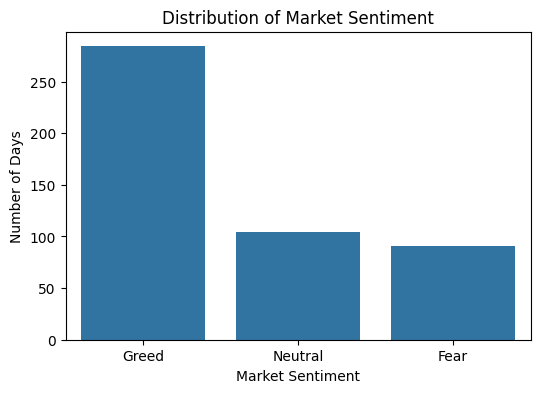

In [51]:
plt.figure(figsize=(6,4))
sns.countplot(x="sentiment", data=merged_df)
plt.title("Distribution of Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Number of Days")
plt.show()

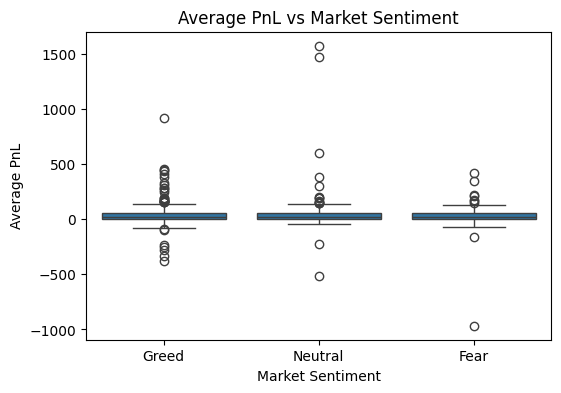

In [52]:
plt.figure(figsize=(6,4))
sns.boxplot(x="sentiment", y="avg_pnl", data=merged_df)
plt.title("Average PnL vs Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average PnL")
plt.show()

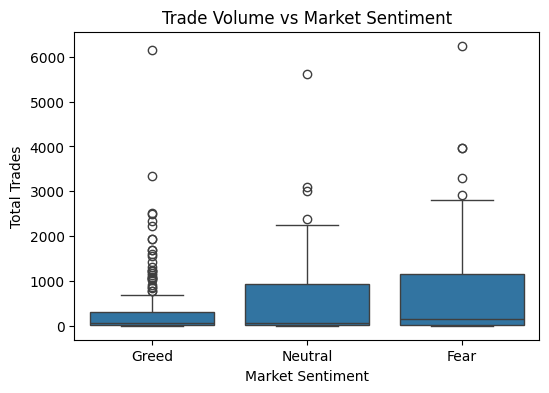

In [53]:
plt.figure(figsize=(6,4))
sns.boxplot(x="sentiment", y="total_trades", data=merged_df)
plt.title("Trade Volume vs Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Total Trades")
plt.show()